In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.integrate import solve_ivp
from math import sqrt, pi, cosh, tanh

In [2]:
L = 10
h = 1
n = 1
mass = 1
inf = 1e5
E=0.5
V0 = 5
mu=L

In [3]:
def initial_r(x):
    return 1/sqrt(L)

def initial_density(x):
    return (initial_r(x))**2

In [4]:
def potential(x):
    return -V0 if L/2 <= x <= L/2+2 else 0

def quantum_potential(x):
    return 0

def acceleration(x):
    return 0

def derive(t, y):
    der = 2.5 * (y[2]**2) / y[1] - ((4*mass/(h*h) * (y[1]**3) * (0.5 * mass * (y[1]**2) + potential(y[0]) - E)))
    return [y[1], y[2], der]

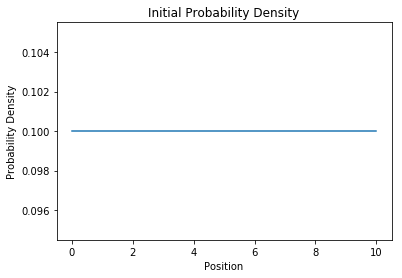

In [5]:
x_plot = np.linspace(0, L, 1000)
distr = [initial_density(x) for x in x_plot]

plt.xlabel("Position")
plt.ylabel("Probability Density")
plt.title("Initial Probability Density")
plt.plot(x_plot, distr)
plt.show()

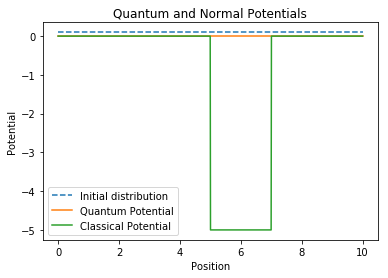

In [6]:
pot = [potential(x) for x in x_plot]
quantum = [quantum_potential(x) for x in x_plot]

plt.xlabel("Position")
plt.ylabel("Potential")
plt.title("Quantum and Normal Potentials")
plt.plot(x_plot, distr, linestyle='--', label='Initial distribution')
plt.plot(x_plot, quantum, label='Quantum Potential')
plt.plot(x_plot, pot, label='Classical Potential')

plt.legend()
plt.show()

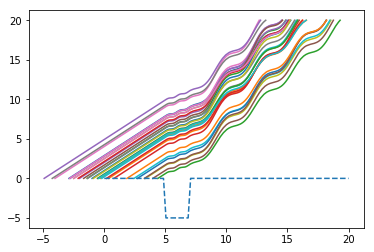

In [7]:
def get_initial():
    x0 = np.random.rand() * L - 0.5 * L
    v0 = sqrt(2/mass * (E - potential(x0) - quantum_potential(x0)))
    return (x0, v0, acceleration(x0))

for i in range(30):
    result = solve_ivp(derive, (0, 20), get_initial(), max_step = 0.5)
    plt.plot(result.y[0], result.t)

X = np.linspace(0, 20, 100)
Y = [potential(x) for x in X]
plt.plot(X, Y, linestyle='--')
plt.show()